In [ ]:
# Biblioteca para deep learning
import keras
from keras.datasets import mnist # Base de dados MNIST
from tensorflow.python.keras import Sequential # Modelo da nossa rede neural
from tensorflow.python.keras.layers import  Dense, Dropout # Neuronios e regularizador (evita overfitt)
from tensorflow.compat.v1.keras.optimizers import RMSprop # Otimizador (back propagation)

In [ ]:
#Carregando os dados de treino e teste
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [ ]:
print("Quantidade de imagens para treino:", len(x_treino))

print("Quantidade de imagens para teste:", len(x_teste))

print("Tipo do x_treino:", type(x_treino))

primeira_imagem = x_treino[0]  #uma lista de lista é uma matriz
representacao_primeira_imagem = y_treino[0]
print('O que representa a imagem 0:', representacao_primeira_imagem)

print('Formato da primeira imagem:', primeira_imagem.shape, type(primeira_imagem.shape))
print('')
print(primeira_imagem)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo do x_treino: <class 'numpy.ndarray'>
O que representa a imagem 0: 5
Formato da primeira imagem: (28, 28) <class 'tuple'>

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 24

Essa imagem representa: 5


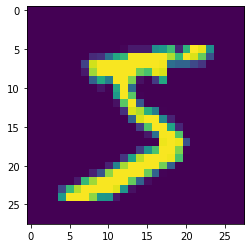

In [ ]:
import matplotlib.pyplot as plt

indice = 0
print('Essa imagem representa:', y_treino[indice])
plt.imshow(x_treino[indice])
plt.show()

Essa imagem representa: 5


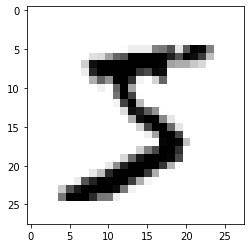

In [ ]:
indice = 0
print('Essa imagem representa:', y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary)
plt.show()

Essa imagem representa: 2


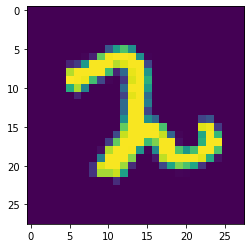

In [ ]:
indice = 31360
print('Essa imagem representa:', y_treino[indice])
plt.imshow(x_treino[indice])
plt.show()

In [ ]:
# Pra fritar o google!!!
'''
for indice in range (60000):
  print('Essa imagem representa:', y_treino[indice])
  plt.imshow(x_treino[indice])
  plt.show()
'''

"\nfor indice in range (60000):\n  print('Essa imagem representa:', y_treino[indice])\n  plt.imshow(x_treino[indice])\n  plt.show()\n"

In [ ]:
# Organizar camada de entrada (input)
# Organizar camada de saída (output)
# Estruturar a nossa rede neural
# Treinar o modelo
# Fazer as previsões

In [ ]:
# Achatando a matriz de pixels e transformando em uma única lista

quantidade_treino = len(x_treino) # 60000
quantidade_teste = len(x_teste) # 10000

resolucao_imagem = x_treino[0].shape #(28,28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] #28 * 28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)


In [ ]:
print('Quantidade de itens em x_treino[0]:', len(x_treino[0]))

# Como ficou x_treino
print(x_treino[0])

Quantidade de itens em x_treino[0]: 784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 25

In [ ]:
# Normalização dos dados

# 255 vira 1
# 127 vira 0.5
# 0 vira 0  e assim por diante 

# precisamos garantir que o valor máximo de entrada é 1
# Como atualmente a imagem fornece um valor máximo de 255, precisamos normalizá-los

x_treino = x_treino.astype('float32') # a rede neural funciona com 'float32'
x_teste = x_teste.astype('float32')

x_treino /= 255
x_teste /= 255 
 
print(x_treino[0][350], type(x_treino[0][350])) #0.27450982 <class 'numpy.float32'> essa tem que ser a saida se não for reiniciar executar tudo 

0.27450982 <class 'numpy.float32'>


In [ ]:
# Vizualizando dados normalizados

print('Dados normalizados:', x_treino[0])

Dados normalizados: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.

In [ ]:
# Preparação da camada de saída

valores_unicos = set(y_treino)

print(valores_unicos)

quantidade_valores_unicos = len(valores_unicos) # 10 
print(quantidade_valores_unicos)

# Transformar os valores únicos em variáveis categóricas
# Número 0 -> [1,0,0,0,0,0,0,0,0,0]
# Número 1 -> [0,1,0,0,0,0,0,0,0,0]
#...
## Número 9 -> [0,0,0,0,0,0,0,0,0,1]

print('y_treino[0] antes:', y_treino[0])

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

print("y_treino[0] depois:", y_treino[0])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10
y_treino[0] antes: 5
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Criar o modelo da rede neural

model = Sequential()

# Primeira hidden layer
# 30 neuronios 
# Função de ativação: ReLU
# Como estamos na primeira hidden layer, precisamos informar o formato da camada de entrada

model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

# Adicioando um regularizador
# No caso será o Dropout
model.add(Dropout(0.2))

# Segunda hidden layer
# 20 neuronios
# Função de ativação ReLU

model.add(Dense(20, activation='relu'))

# Mais um regularizador depois da segunda hidden layer
model.add(Dropout(0.2))

# Finalizamos com a camada de saida (output), informando a quantidade de valores únicos, que no caso é 10
model.add(Dense(quantidade_valores_unicos, activation='softmax'))

# Exibe o resumo do modelo de saída
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compila o modelo

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
# treina o modelo

history = model.fit(x_treino, y_treino,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2592 - accuracy: 0.9250 - val_loss: 0.1585 - val_accuracy: 0.9556
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2552 - accuracy: 0.9253 - val_loss: 0.1597 - val_accuracy: 0.9549
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2500 - accuracy: 0.9274 - val_loss: 0.1531 - val_accuracy: 0.9560
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2447 - accuracy: 0.9294 - val_loss: 0.1563 - val_accuracy: 0.9569
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2411 - accuracy: 0.9305 - val_loss: 0.1497 - val_accuracy: 0.9573
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2415 - accuracy: 0.9301 - val_loss: 0.1594 - val_accuracy: 0.9572
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2385 - accuracy: 0.9307 - val_loss: 0.1479 - val_accuracy: 0.9599
Epoch 

Valor categórico em y_teste[indice] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Previsão: [[9.8499886e-06 7.8903651e-03 3.1477218e-03 7.2372234e-01 5.9675210e-04
  7.3501118e-02 2.6263204e-05 2.3742074e-03 2.4886807e-02 1.6384467e-01]]
Previsão ajustada: [3]


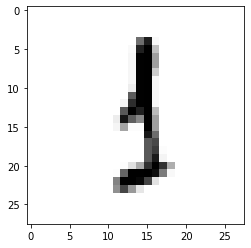

In [ ]:
# Fazendo nossas previsões

indice =900 

# Qual é o valor categórico em y_teste[indice]?

print('Valor categórico em y_teste[indice]', y_teste[indice])

imagem = x_teste[indice].reshape((1, resolucao_total))

prediction = model.predict(imagem)
print('Previsão:', prediction)

# Transformar a previsão em algo que entendemos
import numpy as np
prediction_class = np.argmax(model.predict(imagem), axis=-1)
print('Previsão ajustada:', prediction_class)

# Apenas para visualizar a imagem
(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)
